## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [371]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


Значит, нет пропущенных значений. Категориальных переменных нет, все переменные типа float

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [372]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [374]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_need_tr = X_train.loc[:, ['alcohol', 'magnesium']]
scaled_X_need_tr = scaler.fit_transform(X_need_tr)

X_need_ts = X_test.loc[:, ['alcohol', 'magnesium']]
scaled_X_need_ts = scaler.transform(X_need_ts)

neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_2 = KNeighborsClassifier(n_neighbors=3)
neigh_3 = KNeighborsClassifier(n_neighbors=5)
neigh_4 = KNeighborsClassifier(n_neighbors=10)
neigh_5 = KNeighborsClassifier(n_neighbors=15)
neigh_6 = KNeighborsClassifier(n_neighbors=25)

neigh_1.fit(scaled_X_need_tr, y_train)
neigh_2.fit(scaled_X_need_tr, y_train)
neigh_3.fit(scaled_X_need_tr, y_train)
neigh_4.fit(scaled_X_need_tr, y_train)
neigh_5.fit(scaled_X_need_tr, y_train)
neigh_6.fit(scaled_X_need_tr, y_train)

results = pd.DataFrame({'Train': [], 'Test': []})

res1_1 = accuracy_score(y_train, neigh_1.predict(scaled_X_need_tr))
res2_1 = accuracy_score(y_test, neigh_1.predict(scaled_X_need_ts))
results.loc[1] = [res1_1, res2_1]

res1_2 = accuracy_score(y_train, neigh_2.predict(scaled_X_need_tr))
res2_2 = accuracy_score(y_test, neigh_2.predict(scaled_X_need_ts))
results.loc[2] = [res1_2, res2_2]

res1_3 = accuracy_score(y_train, neigh_3.predict(scaled_X_need_tr))
res2_3 = accuracy_score(y_test, neigh_3.predict(scaled_X_need_ts))
results.loc[3] = [res1_3, res2_3]

res1_4 = accuracy_score(y_train, neigh_4.predict(scaled_X_need_tr))
res2_4 = accuracy_score(y_test, neigh_4.predict(scaled_X_need_ts))
results.loc[4] = [res1_4, res2_4]

res1_5 = accuracy_score(y_train, neigh_5.predict(scaled_X_need_tr))
res2_5 = accuracy_score(y_test, neigh_5.predict(scaled_X_need_ts))
results.loc[5] = [res1_5, res2_5]

res1_6 = accuracy_score(y_train, neigh_6.predict(scaled_X_need_tr))
res2_6 = accuracy_score(y_test, neigh_6.predict(scaled_X_need_ts))
results.loc[6] = [res1_6, res2_6]

res1_6 = np.mean(y_train==neigh_6.predict(scaled_X_need_tr))
res2_6 = np.mean(y_test==neigh_6.predict(scaled_X_need_ts))

results.index = ['1', '3', '5', '10', '15', '25']
results.index.name = 'NN'

In [375]:
results

,Train,Test
NN,,
1,1.000000,0.666667
3,0.806452,0.777778
5,0.750000,0.722222
10,0.733871,0.777778
15,0.733871,0.796296
25,0.669355,0.796296


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [118]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [120]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

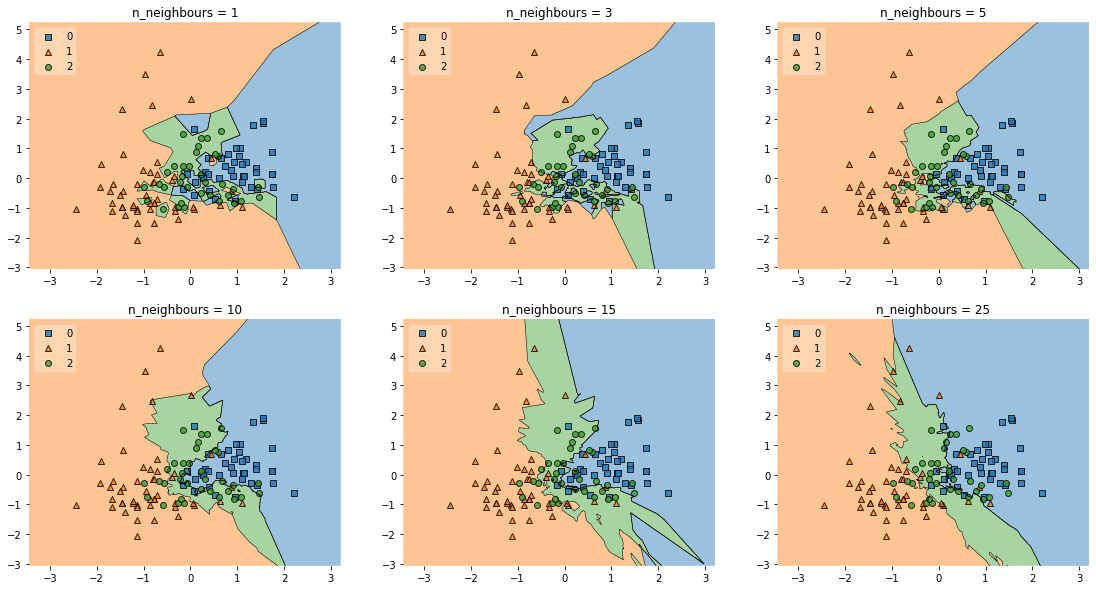

In [163]:
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3) # значит, будет табличка с двумя строками и тремя столбцами
fig = plt.figure(figsize=(19,10)) # значит, наконец-то не скукоженно!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 
          'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']

for clf, lab, grd in zip([neigh_1, neigh_2, neigh_3, neigh_4, neigh_5, neigh_6],
                         labels,
                         itertools.product([0, 1], [0, 1, 2])): # а это значит, что будут пары (0, 0), (0, 1), (0, 2), (1, 0),
                                                                # (1, 1), (1, 2)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=scaled_X_need_tr, y=y_train, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

# ну какова красота

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Несложно заметить, что при k = 1 на обучающей выборке выглядит лучше всего, но на тесте дает худший результат. Очевидно, k = 1 как оптимальный результат отбросим, ничего интеллектуального эта модель не делает. 

По моим результатам k = 15 и k = 25 дают лучший результат на тесте, но по результатам из примеров, которые были в домашке до моего заполнения ноутбука, они одни из худших и по качеству не лучше k = 1 (но они дают разумную мысль начать пользоваться кросс-валидацией, но, т.к. по заданию этого не было, оставлю силы на десерт). Кажется, это затрудняет разумный анализ, но на обучающей выборке все еще плюс-минус нормально, и я попробую!

По поверхностям кроме k = 1 никто не реагирует на красненькие вбросы, которые замешались среди синих и зеленых, но при k < 15 красные сверху определяются как красные хорошо. На k = 15 и k = 25 с ними беда. На k = 25 вообще мало что попало в нужное, кроме совсем очевидных скоплений. Но и на тесте по заданию 1.3 этот результат худший. В общем, k = 25 тоже точно неоптимально ипользовать, становится слишком примитивно.

Выбор между k = 10 и k = 15 довольно сложный. На тесте по заданию 1.3 результат у них одинаковый. Сравнением поверхностей вижу, что кое-где, где на k = 10 определено неправильно, фигура касается нужного цвета, но и на k = 15 такое тоже есть. Если долго смотреть, то кажется, что k = 10 лучше, но, может, это из-за явно стоящего на месте, в отличие от k = 15, верхнего красного треугольника. Тут сказать трудно, думаю, что нужно все-таки делать кросс-валидацию и смотреть. Но если выбирать по данной ситуации, то кажется, что k = 10 попадает или близок к попаданию все-таки почаще.

Про k = 3 и k = 5. k = 3 дает лучший результат на тесте после k = 1. По поверхности оно и видно: в целом все на своем месте. И на тесте k = 3 справляется отлично. k = 5 явно похуже: меньше угадывает, да и по заданию 1.3 доля правильных ответов и на тесте, и на обучающей выборке хуже. В примере из исходной тетрадки на тесте k = 5 чуть-чуть лучше, но некритично. Я думаю, что по моим данным k = 3 лучше k = 5. Ну и чем k = 10 оно объективно лучше и по моим данным, и по данным примера. Так что вывод из заданий 1.3 и 1.5 я могу сделать такой: оптимально использовать k = 3. 

Под геометрией данных не до конца понимаю, что имели в виду (загуглила и получила про симпликсы, нет уж, спасибо), поэтому написала про все и учитывая разное. Но думаю, что что бы я не анализировала, вывод бы сделала один и тот же.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

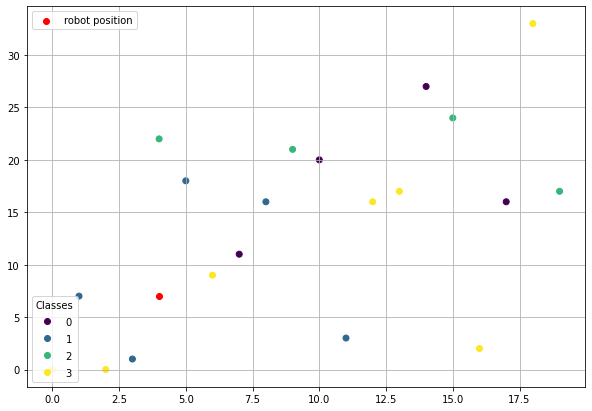

In [5]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [170]:
from sklearn.neighbors import KNeighborsClassifier

In [357]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(landmarks, classes)
        # думала поделить данные на тестовые и обучающие, но не знаю, что потом делать с тестовой...
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        # seed добавлять не буду, а то каждый ход будет одно и то же
        choice = np.random.binomial(1, 0.2) # подбрасываем монетку с p(1) = 0.2 (0 -- пойти по knn, 1 -- направо)
        initial_position = self.trajectory[-1]
        if choice == 0:
            class_pos = self.knn.predict(np.array([initial_position]))[0] # класс ближайших соседей
        else:
            class_pos = 0 # класс, соответствующий походу направо
        
        new_pos = initial_position + self.mapping[class_pos]
        self.trajectory = np.append(self.trajectory, new_pos)
        self.trajectory = self.trajectory.reshape(self.trajectory.size//2, 2)

In [358]:
# чекаю, как все выглядит

knn = KNeighborsClassifier(n_neighbors=3)
np.random.seed(12345)
    # Generate random landmarks
landmarks = np.vstack((x, x + np.round(np.random.normal(0, 2, len(x))))).T
x = np.arange(30)

init = np.array([10, 20])
tr = np.array([init])
new = tr + [0, 1]
tr = np.append(tr, new)
tr = tr.reshape(tr.size//2, 2)

    # Generate random classes of landmarks
classes = np.random.randint(0, 4, size = len(x))

initial_position = tr[-1]
knn.fit(landmarks, classes)
knn.predict(np.array([initial_position]))

array([2])

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [367]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    # traj = robot.trajectory.reshape(robot.trajectory.size//2, 2)
    traj = robot.trajectory # мне оказалось удобно сделать сразу нормально
    
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

In [360]:
# это я разбиралась, как выглядит массив с траекторией. удивлена, что не сразу как [[-1, -1], [-1, 0]]

init = np.array([10, 20])
tr = np.array([init])
new = tr + [0, 1]
tr = np.append(tr, new)
print(tr)
tr = tr.reshape(tr.size//2, 2)
print(tr)

[10 20 10 21]
[[10 20]
 [10 21]]


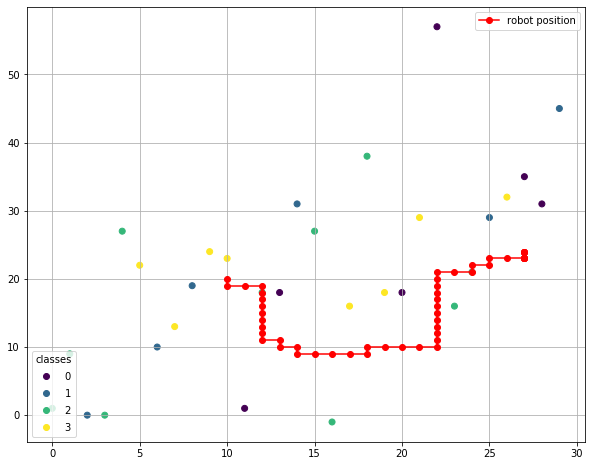

In [363]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

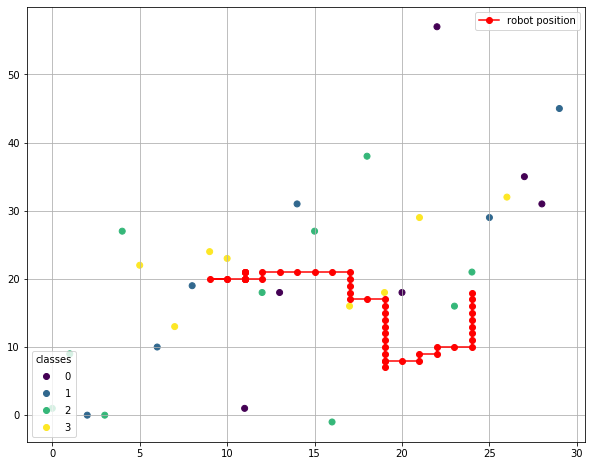

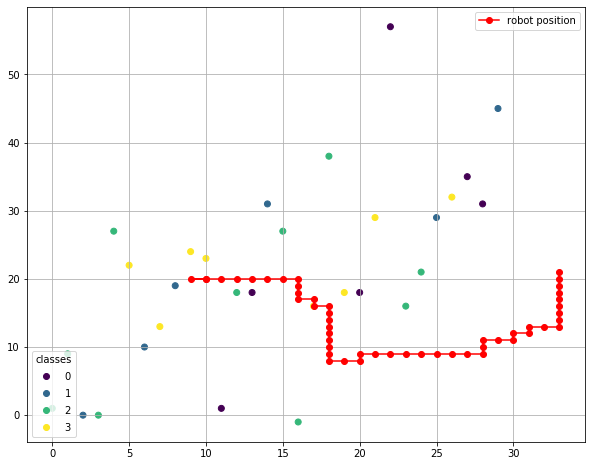

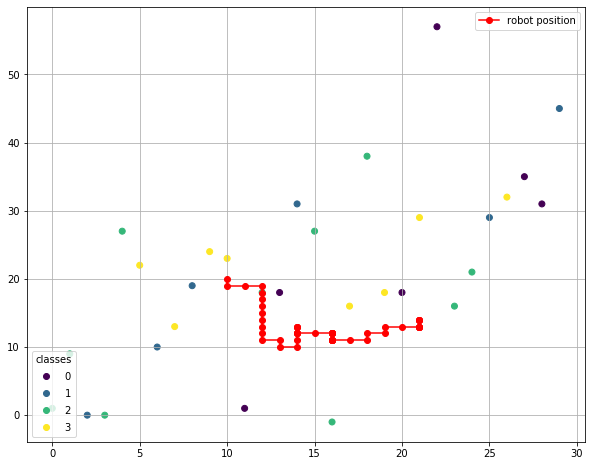

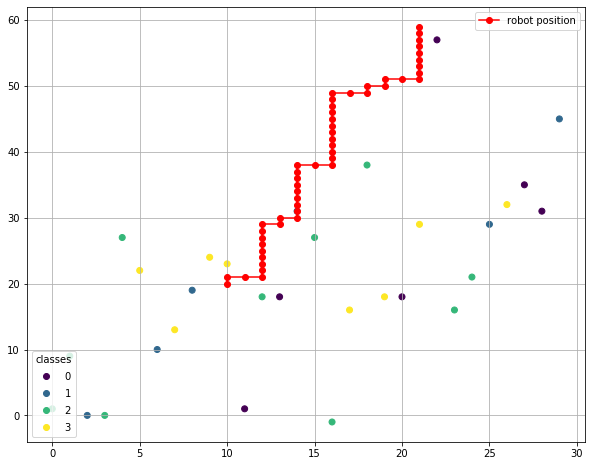

In [368]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)
# сначала думала сделать покрасивее, но потом показалось, что это будет бесполезным вложением времени...

Я еще позапускала на других значениях seed, чтобы посмотреть, как еще мог робот ходить. Показалось, что на исходном сиде в целом без особых специфичностей, так что оставила его.

Стратегия движения при k = 1 проста: или на какой класс указывает ближайший сосед, или вправо. То есть меняется направление в двух случаях: выпал орел и сменился самый ближайший сосед. Таким образом, при k = 1 траектория в целом больше всего меняется, ведь она очень сильно зависит от того, кто именно окажется с данным положением рядом.

Другой простой случай --- k = 30. Всего точек у нас тоже 30. Значит, при каждом ходе ближайшие 30 соседей одни и те же --- потому что у нас всего 30 соседей, ближайших и неближайших. Так что направление, задаваемое knn, всегда одинаковое. Меняться оно может, только если выпадет орел (и если направление knn было не вправо). Так что траектория довольно проста, т.к. направления всего два (а может быть и одно, если направление knn будет вправо), а они друг с другом чередуются.

Чем больше k, тем меньше при движении меняется набор соседей, а поэтому и knn несильно меняет результат. Т.к. направление меняется в двух случаях --- выпадает орел (если не было и так вправо) с вероятностью 20% или меняются ближайшие соседи, а ближайшие соседи меняются реже, чем при маленьких k, график в целом реже меняет направления, длина линейных участков больше, чем при маленьких k. Так что при маленьких k траектория больше меняется, а при больших k траектория более спокойная: длина линейных промежутков больше.

Если классы будут неслучайны, то метки будут расположены скорее скоплениями, тогда ближайший сосед будет меняться реже --- значит, и линейные кусочки будут больше (конечно, из-за выпадения орла они могут ломаться, но в целом чаще, к тому же орел в 20%, а не в большем числе случаев). Когда k большие, будет более стабильно, чем при маленьких k, потому что большие k смотрят на скопления, а маленькие больше на самые ближайшие, а самые ближайшие необязательно одинакового цвета. А кучки скорее примерно одинакового цвета, и большие k не учитывают случайно затесавшиеся в конкретную кучку метки, которые не такие, как все. Так что большие k меньше реагируют на изменения и поэтому реже меняют направления, а потому и длина линейных участков у них в целом больше (как уже сказали, из-за орла могут сломаться, но и в маленьких ломаются, просто из-за более частой смены направления может быть не так заметно, что именно из-за орла, а вот с большими k можем отследить, что именно из-за орла, т.к. очень большая линия вправо скорее из-за направления knn, чем из-за того, что много раз подряд выпал орел (который выпадает не с такой уж и маленькой вероятностью, но много раз подряд эта вероятность будет не очень большой)).

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [427]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Значит, нет пропущенных.

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [428]:
data = data.drop(['Unnamed: 0'], axis=1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [429]:
target = data.loc[:, 'price']
data_real = data.select_dtypes(include=['int64', 'float64'])

result = data_real.corr()
result

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [282]:
result['price']

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

Больше всего кореллирует вес (цена, очевидно, не считается) и длина, ширина, высота.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [430]:
old_data = pd.DataFrame.copy(data) # вдруг пригодится, раз я теперь по одному названию теряю для каждого категориального признака
                                   # из-за drop_first
data = pd.get_dummies(data, drop_first=True)
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [431]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
data = data.drop(['price'], axis=1) # настало время удалить таргет... я его сохранила в третьем задании
X_train, X_test, y_train, y_test = train_test_split(data_t, target, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [432]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

nums = data.columns.tolist()[0:6] # названия числовых столбцов
others = data.columns.tolist()[6:] # названия закодированных столбцов

X_tr = X_train.loc[:, nums]
X_ts = X_test.loc[:, nums]

X_tr_one_hot = X_train.loc[:, others]
X_ts_one_hot = X_test.loc[:, others]

X_tr_p = scaler.fit_transform(X_tr)
X_ts_p = scaler.transform(X_ts)

X_train = np.concatenate((X_tr_p, X_tr_one_hot), axis=1)
X_test = np.concatenate((X_ts_p, X_ts_one_hot), axis=1)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [466]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
y_train_res = reg.predict(X_train)
y_test_res = reg.predict(X_test)

er_regr = mean_squared_error(y_test, y_test_res)

print("среднеквадратичная ошибка на тренировочной выборке:", mean_squared_error(y_train, y_train_res))
print("среднеквадратичная ошибка на тестовой выборке:", mean_squared_error(y_test, y_test_res))

среднеквадратичная ошибка на тренировочной выборке: 1284661.8621191257
среднеквадратичная ошибка на тестовой выборке: 1258940.8504935654


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [481]:
reg_c = reg.coef_
reg_c

array([ 5.27811998e+03, -9.42669361e+01, -6.56183723e+01, -1.05002476e+03,
       -2.64737971e+00, -4.05686230e+01,  5.41639869e+02,  7.95786817e+02,
        7.21797535e+02,  6.98433173e+02, -1.80617972e+02, -2.36924694e+02,
       -4.50558533e+02, -9.43618044e+02, -1.42880833e+03, -2.34337515e+03,
        5.33355507e+03,  3.67037809e+03,  2.70186810e+03,  4.59244827e+03,
        4.27255738e+03,  5.02155858e+03,  4.95459850e+03])

Называю нужные вещественные переменные: carat, x.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [478]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=10)
lasso.fit(X_train, y_train)
lasso_c = lasso.coef_
lasso_c

array([ 4.71743050e+03, -1.53897630e+02, -1.14359498e+02, -6.34665961e+02,
       -0.00000000e+00, -2.38637594e+01, -0.00000000e+00,  1.57773311e+02,
        6.49642121e+01,  8.29123605e+01,  2.89245109e+00,  0.00000000e+00,
       -1.11417566e+02, -5.94797373e+02, -9.89237948e+02, -1.78579096e+03,
        1.36634737e+03,  7.08619218e+01, -7.35084934e+02,  9.09413824e+02,
        6.55593919e+02,  1.24299124e+03,  1.24071029e+03])

In [477]:
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train, y_train)
rid_c = ridge.coef_
rid_c

array([ 5.22844129e+03, -9.72441606e+01, -6.85479296e+01, -1.01276713e+03,
       -1.71800611e+00, -4.16912899e+01,  5.64972250e+02,  8.23308089e+02,
        7.46147154e+02,  7.27722546e+02, -1.68557828e+02, -2.23702621e+02,
       -4.33182440e+02, -9.26878179e+02, -1.40434915e+03, -2.30843494e+03,
        4.76047220e+03,  3.14279042e+03,  2.18215462e+03,  4.05576226e+03,
        3.74139226e+03,  4.47074534e+03,  4.41139173e+03])

In [484]:
rid_c -= reg_c
print(rid_c, np.sum(rid_c)/rid_c.size)

[ -49.67869442   -2.97722444   -2.92955737   37.2576273     0.9293736
   -1.12266694   23.33238147   27.52127205   24.34961914   29.28937317
   12.06014485   13.22207315   17.37609303   16.7398648    24.45918201
   34.94020611 -573.08287234 -527.58767054 -519.7134816  -536.68600494
 -531.16511831 -550.81324698 -543.2067723 ] -155.54287389210558


In [483]:
lasso_c -= reg_c
print(lasso_c, np.sum(lasso_c)/lasso_c.size)

[-1.62956920e+04  2.29124563e+02  1.53973106e+02  3.49091782e+03
  8.73077162e+00  1.40656066e+02 -2.21322424e+03 -3.08041650e+03
 -2.87092517e+03 -2.76939908e+03  7.01244051e+02  9.21254631e+02
  1.65606438e+03  3.14619507e+03  4.67707702e+03  7.51782923e+03
 -1.88217072e+04 -1.35554751e+04 -1.05031304e+04 -1.63870072e+04
 -1.53723054e+04 -1.77416166e+04 -1.74912702e+04] -4976.482709012033


Чуть выше я вычла из коэффициентов Лассо и Ридж коэффициенты обычной линейной регрессии и посмотрела, насколько в среднем изменился каждый элемент (очень примитивно --- все просуммировала и поделила на число элементов). Получилось, что Ридж уменьшил коэффициенты, но в целом несильно и некритично, особенно учитывая величину весов, а Лассо нормально уменьшил коэффициенты, не суперсильно, но учитывая, что мы взяли среднее, тоже неплохо хоть насколько-то лучше получить.

В изначальной регрессии проявлялась проблема мультиколлинеарности, веса были большие. Они и сейчас большеватые даже в Лассо, но в целом получше.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

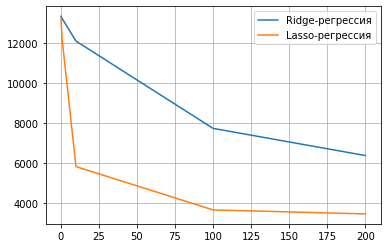

In [449]:
ridge_lin = np.array([])
lasso_lin = np.array([])
alphas = np.array([0.1, 1, 10, 100, 200])

for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    ridge_lin = np.append(ridge_lin, np.linalg.norm(ridge.coef_))
    lasso_lin = np.append(lasso_lin, np.linalg.norm(lasso.coef_))
    
plt.grid()
plt.plot(alphas, ridge_lin, label="Ridge-регрессия")
plt.plot(alphas, lasso_lin, label="Lasso-регрессия")
plt.legend()

Как видно по графику, Lasso-регрессия агрессивнее уменьшает веса. Причина, почему Lasso-регрессию часто используют для отбора признаков, такова: Lasso-регрессия зануляет некоторые веса и потому эти признаки можно не использовать (вот и отобрали), а Ridge-регрессия равномерно их уменьшает.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [462]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

reg = LassoCV(cv=5, alphas=alphas)
reg.fit(X_train, y_train)

arg = np.argmin(np.mean(reg.mse_path_, axis = 1))
print(reg.alphas_[arg])

1.0


C:\Users\KOTIK\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1177271856.754177, tolerance: 48309472.87280813
  tol, rng, random, positive)


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [464]:
lasso = linear_model.Lasso(alpha=1)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 5219.22347004,  -103.13762135,   -72.1147423 , -1009.83968765,
          -0.        ,   -38.51315893,   437.82050935,   694.91027222,
         619.88427512,   601.60047184,  -127.15409692,  -183.44785077,
        -392.82799349,  -885.21920917, -1360.43955047, -2263.2030689 ,
        4792.95148523,  3171.13910035,  2206.8162007 ,  4082.07719954,
        3770.07330299,  4500.32277913,  4440.81059919])

Размер по y оказался бесполезным, его вклад в итог равен нулю. По z тоже достаточно маленький, поэтому можно сказать, что неинформативный. depth и table относительно остальных величин тоже неинформативные, но, думаю, вряд ли можно сказать, что бесполезные. Наиболее информативные --- carat и clarity_IF. Я дилетант, но чем больше вес, тем круче и сам камушек крупнее, странно, если за большой нужной будет заплатить меньше, чем за маленький, так что связь каратов и цены очевидная. IF --- это категория самых прозрачных бриллиантов, что тоже очень круто, так что понятно, почему за это надо очень много заплатить. Так что все связи очевидные, подкреплю это тем, что после carat и clarityIF наибольший по модулю вес имеет clarityVVS1, а VVS1 по крутизне (как говорит описание данных по ссылке на kaggle) на втором месте после IF. Так что все работает правильно!

Понятно, почему длина имеет большой вес: все хотят длинные бриллианты на кулончиках или кольцах, например. Но почему y и z мало весят? Они в целом предсказуемы по длине и весу: если бриллиант длинный и много весит, он, наверное, толстый, а если бриллиант длинный и мало весит, наверное, тонкий. Так что в целом можно угадать и хорошо, что Лассо эту линейную зависимость погасило.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [469]:
er_lasso = mean_squared_error(y_test, lasso.predict(X_test))
print(er_lasso - er_regr) # er_regr -- записывала ошибку в 3.7 в эту переменную

6957.89568878361


Получается, Lasso справляется чуть лучше. Но относительно величины ошибок Lasso и обычной линейной регрессии разность не такая критичная, и в целом Lasso и обычная линейная регрессия работают примерно одинаково, но все же Lasso чуть лучше. В Lasso мы убрали совсем неинформативные признаки, т.к. некоторые занулились, а в обычной регрессии они учитывались. Lasso стремится решить проблему мультиколлинеарности, а значит и переобучения. Поэтому качество этой модели будет лучше.

Я закончила.